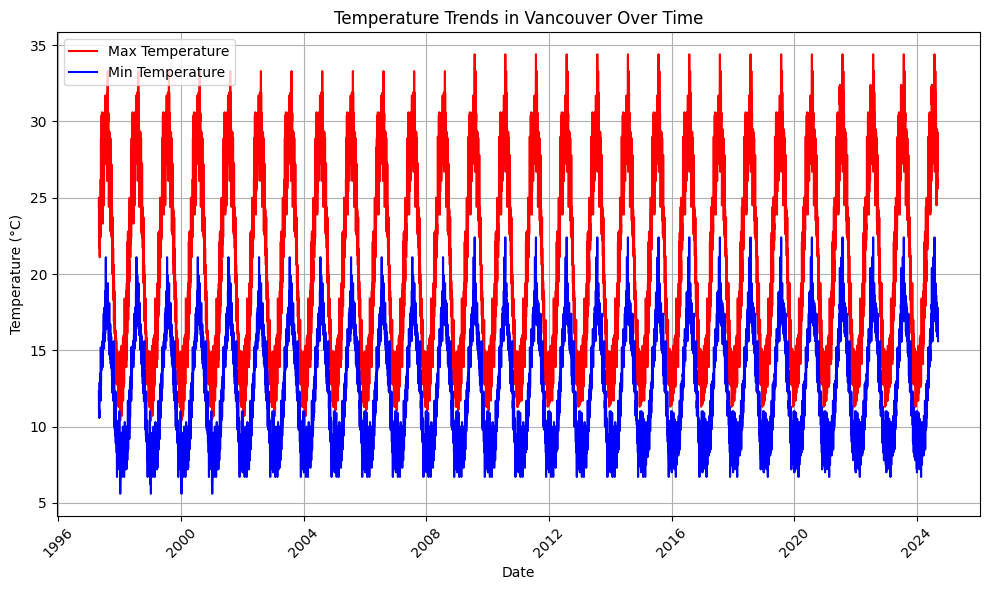

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Vancouver weather data
file_path = 'vancouver_weather.csv'
vancouver_weather = pd.read_csv(file_path)

# Convert the 'date' column to datetime for proper time-series analysis
vancouver_weather['date'] = pd.to_datetime(vancouver_weather['date'])

# Extract relevant columns for temperature analysis
temperature_data = vancouver_weather[['date', 'max_min_temperature_v', 'max_temperature_v', 'min_temperature_v']]

# Rename the columns for easier interpretation
temperature_data.columns = ['Date', 'Min Temperature', 'Max Temperature', 'Avg Temperature']

# Sort data by date for proper trend visualization
temperature_data = temperature_data.sort_values(by='Date')

# Plot the max and min temperature trends over time
plt.figure(figsize=(10, 6))
plt.plot(temperature_data['Date'], temperature_data['Max Temperature'], label='Max Temperature', color='red')
plt.plot(temperature_data['Date'], temperature_data['Min Temperature'], label='Min Temperature', color='blue')
plt.title('Temperature Trends in Vancouver Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


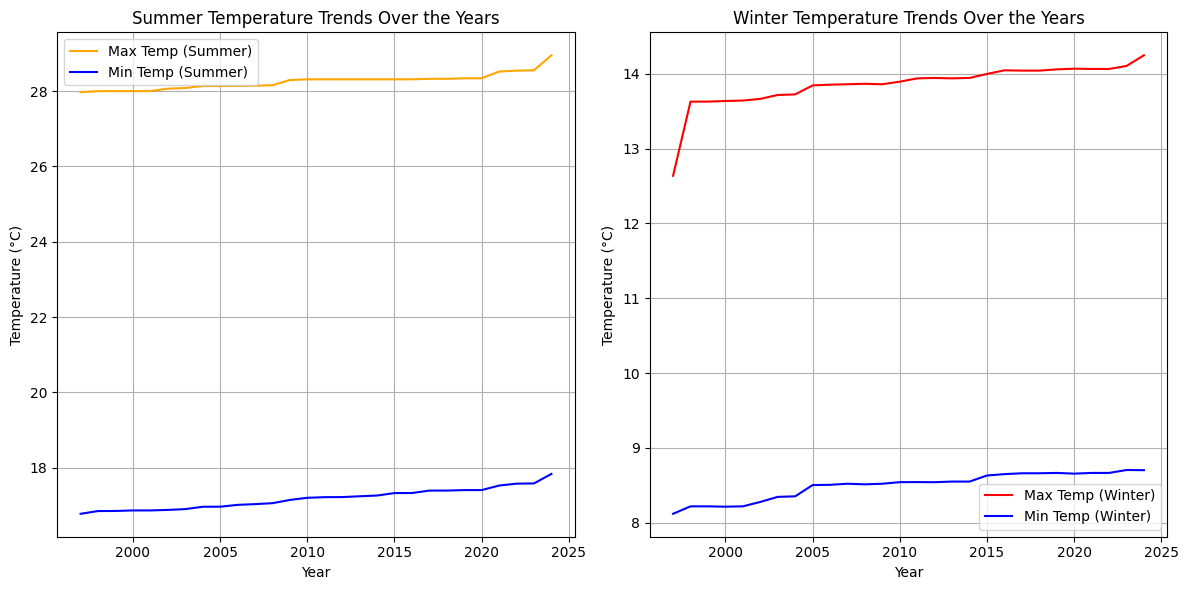

In [2]:
# Function to assign a season to each date
def assign_season(date):
    year = date.year
    seasons = {
        'Winter': (pd.Timestamp(f'{year}-12-21'), pd.Timestamp(f'{year+1}-03-20')),
        'Spring': (pd.Timestamp(f'{year}-03-21'), pd.Timestamp(f'{year}-06-20')),
        'Summer': (pd.Timestamp(f'{year}-06-21'), pd.Timestamp(f'{year}-09-20')),
        'Fall': (pd.Timestamp(f'{year}-09-21'), pd.Timestamp(f'{year}-12-20')),
    }
    
    for season, (start, end) in seasons.items():
        if start <= date <= end:
            return season
    return 'Winter'  # Handle dates that fall in the overlapping winter range of the next year

# Apply the season assignment function to the dataset
temperature_data['Season'] = temperature_data['Date'].apply(assign_season)

# Add the 'Year' column for further analysis
temperature_data['Year'] = temperature_data['Date'].dt.year

# Group data by Year and Season and calculate the average temperatures
seasonal_avg_temp = temperature_data.groupby(['Year', 'Season'])[['Max Temperature', 'Min Temperature']].mean().reset_index()

# Filter data for Summer and Winter
summer_data = seasonal_avg_temp[seasonal_avg_temp['Season'] == 'Summer']
winter_data = seasonal_avg_temp[seasonal_avg_temp['Season'] == 'Winter']

# Plot Summer and Winter temperature trends
plt.figure(figsize=(12, 6))

# Summer trends
plt.subplot(1, 2, 1)
plt.plot(summer_data['Year'], summer_data['Max Temperature'], label='Max Temp (Summer)', color='orange')
plt.plot(summer_data['Year'], summer_data['Min Temperature'], label='Min Temp (Summer)', color='blue')
plt.title('Summer Temperature Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

# Winter trends
plt.subplot(1, 2, 2)
plt.plot(winter_data['Year'], winter_data['Max Temperature'], label='Max Temp (Winter)', color='red')
plt.plot(winter_data['Year'], winter_data['Min Temperature'], label='Min Temp (Winter)', color='blue')
plt.title('Winter Temperature Trends Over the Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

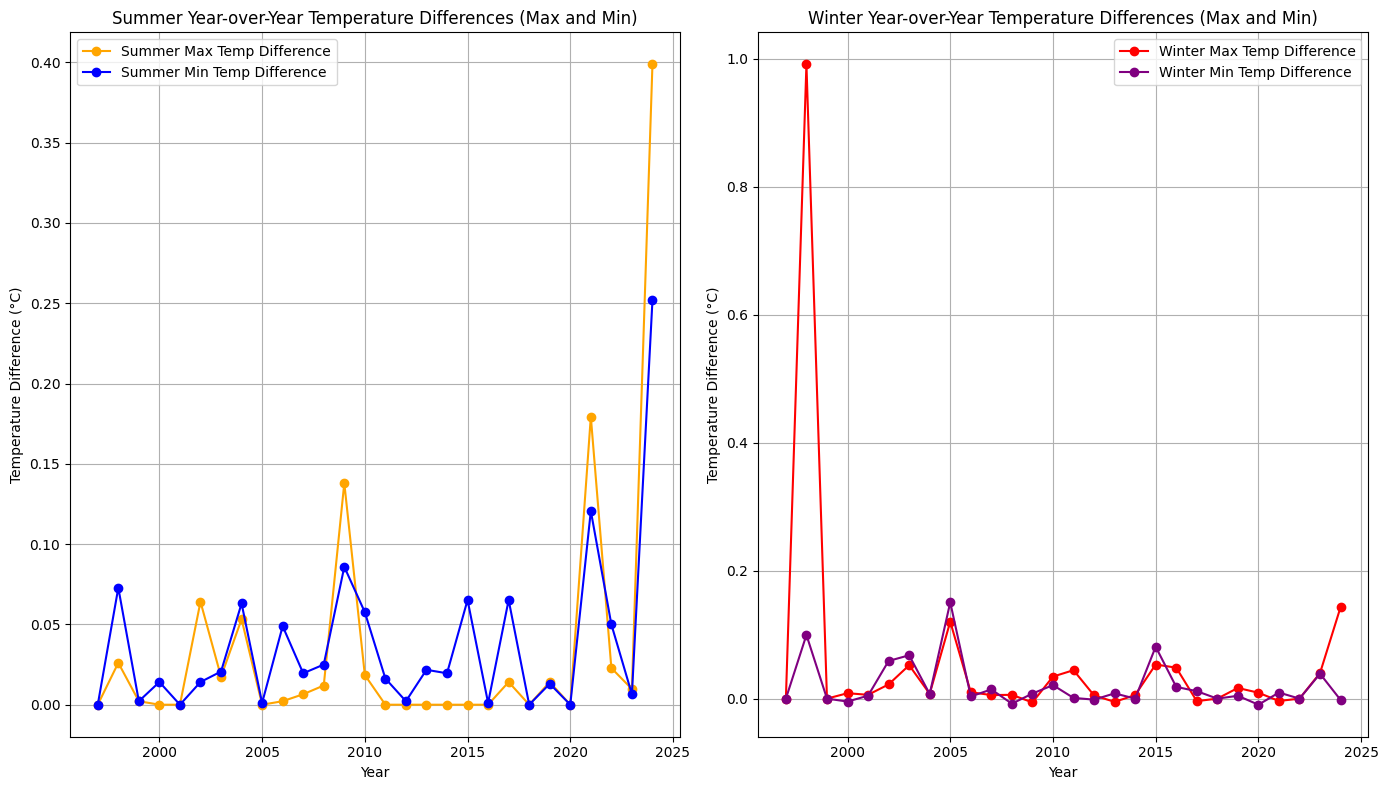

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate year-over-year differences
def calculate_yearly_difference(temps):
    yearly_diff = [0]  # Initialize with 0 for the first year, as there's no previous year to compare
    for i in range(1, len(temps)):
        yearly_diff.append(temps[i] - temps[i-1])  # Calculate the difference from the previous year
    return yearly_diff

# Lists for summer max and min temperatures
summer_max_temps = summer_data['Max Temperature'].tolist()
summer_min_temps = summer_data['Min Temperature'].tolist()

# Lists for winter max and min temperatures
winter_max_temps = winter_data['Max Temperature'].tolist()
winter_min_temps = winter_data['Min Temperature'].tolist()

# List of years corresponding to the temperature data
years = summer_data['Year'].tolist()

# Calculate year-over-year differences
summer_max_diff = calculate_yearly_difference(summer_max_temps)
summer_min_diff = calculate_yearly_difference(summer_min_temps)
winter_max_diff = calculate_yearly_difference(winter_max_temps)
winter_min_diff = calculate_yearly_difference(winter_min_temps)

# Create the subplots for Summer and Winter
plt.figure(figsize=(14, 8))

# Subplot for Summer
plt.subplot(1, 2, 1)
plt.plot(years, summer_max_diff, label='Summer Max Temp Difference', color='orange', marker='o')
plt.plot(years, summer_min_diff, label='Summer Min Temp Difference', color='blue', marker='o')
plt.title('Summer Year-over-Year Temperature Differences (Max and Min)')
plt.xlabel('Year')
plt.ylabel('Temperature Difference (°C)')
plt.legend()
plt.grid(True)

# Subplot for Winter
plt.subplot(1, 2, 2)
plt.plot(years, winter_max_diff, label='Winter Max Temp Difference', color='red', marker='o')
plt.plot(years, winter_min_diff, label='Winter Min Temp Difference', color='purple', marker='o')
plt.title('Winter Year-over-Year Temperature Differences (Max and Min)')
plt.xlabel('Year')
plt.ylabel('Temperature Difference (°C)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


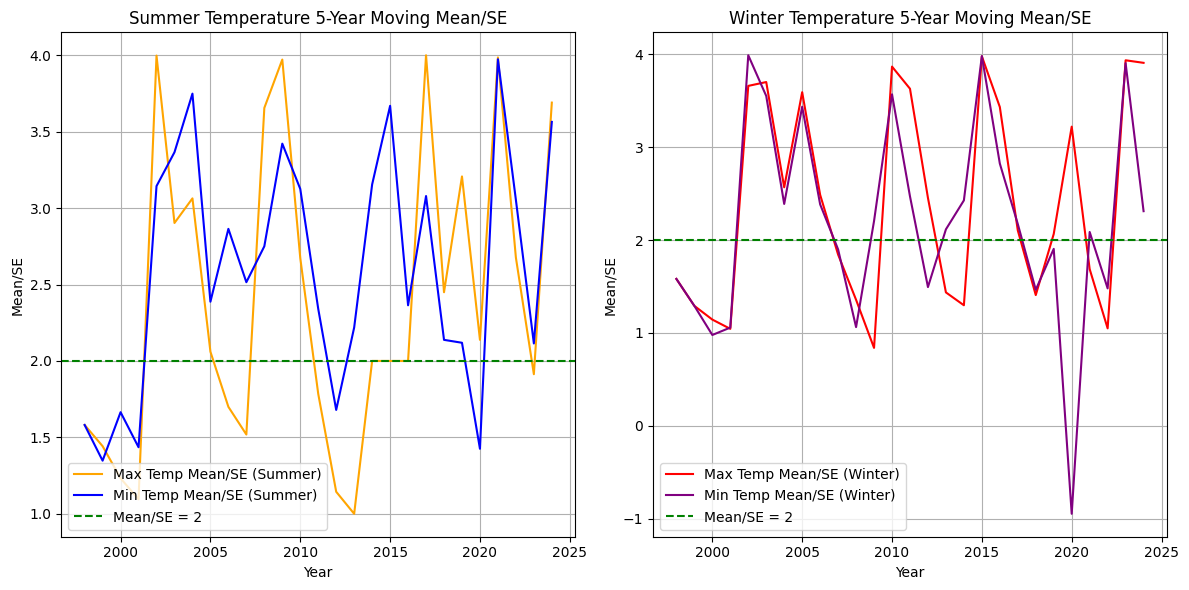

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the five-year moving average divided by SE for a list of temperatures
def calculate_moving_mean_se(temps, window_size=5):
    mean_se_list = []
    for i in range(len(temps)):
        if i < window_size:
            # For the initial values where we don't have enough data, take whatever data is available
            window_temps = temps[:i+1]
        else:
            # Take the last 'window_size' number of temperatures
            window_temps = temps[i-window_size+1:i+1]
        
        # Calculate the moving average and standard error
        moving_mean = np.mean(window_temps)
        moving_std_dev = np.std(window_temps, ddof=1)
        standard_error = moving_std_dev / np.sqrt(window_size)
        
        # Calculate mean/SE
        mean_se = (temps[i] - moving_mean) / standard_error
        mean_se_list.append(mean_se)
    
    return mean_se_list

# Lists for summer max and min temperatures
summer_max_temps = summer_data['Max Temperature'].tolist()
summer_min_temps = summer_data['Min Temperature'].tolist()

# Lists for winter max and min temperatures
winter_max_temps = winter_data['Max Temperature'].tolist()
winter_min_temps = winter_data['Min Temperature'].tolist()

# List of years corresponding to the temperature data
years = summer_data['Year'].tolist()

# Calculate five-year moving mean/SE for each list
summer_max_mean_se = calculate_moving_mean_se(summer_max_temps, window_size=5)
summer_min_mean_se = calculate_moving_mean_se(summer_min_temps, window_size=5)
winter_max_mean_se = calculate_moving_mean_se(winter_max_temps, window_size=5)
winter_min_mean_se = calculate_moving_mean_se(winter_min_temps, window_size=5)

# Plotting the five-year moving mean/SE for Summer and Winter
plt.figure(figsize=(12, 6))

# Subplot for Summer moving mean/SE
plt.subplot(1, 2, 1)
plt.plot(years, summer_max_mean_se, label='Max Temp Mean/SE (Summer)', color='orange')
plt.plot(years, summer_min_mean_se, label='Min Temp Mean/SE (Summer)', color='blue')
plt.axhline(y=2, color='green', linestyle='--', label='Mean/SE = 2')  # Adding horizontal line
plt.title('Summer Temperature 5-Year Moving Mean/SE')
plt.xlabel('Year')
plt.ylabel('Mean/SE')
plt.legend()
plt.grid(True)

# Subplot for Winter moving mean/SE
plt.subplot(1, 2, 2)
plt.plot(years, winter_max_mean_se, label='Max Temp Mean/SE (Winter)', color='red')
plt.plot(years, winter_min_mean_se, label='Min Temp Mean/SE (Winter)', color='purple')
plt.axhline(y=2, color='green', linestyle='--', label='Mean/SE = 2')  # Adding horizontal line
plt.title('Winter Temperature 5-Year Moving Mean/SE')
plt.xlabel('Year')
plt.ylabel('Mean/SE')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
